In [1]:
import os
from collections import defaultdict
import pandas as pd
import geopandas as gpd
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = "../../data"
os.listdir(data_dir)

['bus_stops_wszone.dbf',
 'bus_stops_wszone.shp',
 'net_202001_weekday_G.net',
 'singstat',
 'net_202001_weekend_G.net',
 'origin_destination_bus_202001_scaleddown.csv.xz',
 'net_202001_weekendb.net',
 'OD_bus',
 'net_202001_weekdayb.net',
 'train_station_wszone.prj',
 'origin_destination_train_202001.csv.xz',
 'train_station_wszone.dbf',
 'OD_202001_weekend.csv.xz',
 'subzone_centroid.csv',
 'transport_node_bus_202001.csv',
 'train_station_wszone.cpg',
 'OD_PT',
 'train_station_wszone.shx',
 'planning-area-2014',
 'subzone_centroid_pos.json',
 '.ipynb_checkpoints',
 'origin_destination_bus_202001.csv.xz',
 'region-2014',
 'train_station_wszone.shp',
 'OD_train',
 'bus_stops_wszone.shx',
 'OD_202001_weekday.csv.xz',
 'bus_stops_wszone.prj',
 'subzone-2014',
 'bus_stops_wszone.cpg']

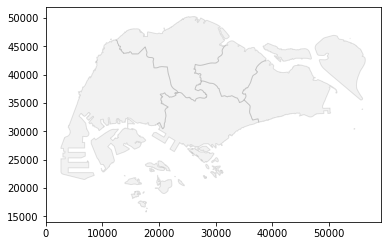

In [4]:
region = gpd.read_file("../../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [5]:
with open(os.path.join("../../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

In [6]:

res_dir = "../b-calculation/results/"

In [7]:
weekday_res = pd.read_csv(res_dir+"Super_SR_weekday_G.csv", index_col=0)
weekend_res = pd.read_csv(res_dir+"Super_SR_weekend_G.csv", index_col=0)

In [8]:
weekday_res.head()

,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
ind,,,,,,,
0,NEWTON CIRCUS,0.402520,0.360719,0.385378,0.389101,0.357611,0.370971
1,BOULEVARD,0.502729,0.472499,0.498768,0.573979,0.539979,0.549315
2,CHINATOWN,0.544634,0.482205,0.512824,0.401757,0.371728,0.381759
3,MOULMEIN,0.412346,0.393649,0.387418,0.425115,0.411934,0.401186
4,CITY HALL,0.477205,0.457724,0.457491,0.419084,0.409713,0.395974


In [9]:
weekend_res.head()

,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
ind,,,,,,,
0,NEWTON CIRCUS,0.374552,0.356007,0.356568,0.382609,0.379077,0.362288
1,BOULEVARD,0.565604,0.549566,0.552570,0.652704,0.630635,0.622696
2,CHINATOWN,0.567815,0.530688,0.527738,0.410432,0.404457,0.388654
3,MOULMEIN,0.391984,0.393080,0.365803,0.404386,0.407353,0.381143
4,CITY HALL,0.498184,0.501246,0.471670,0.426942,0.436006,0.401107


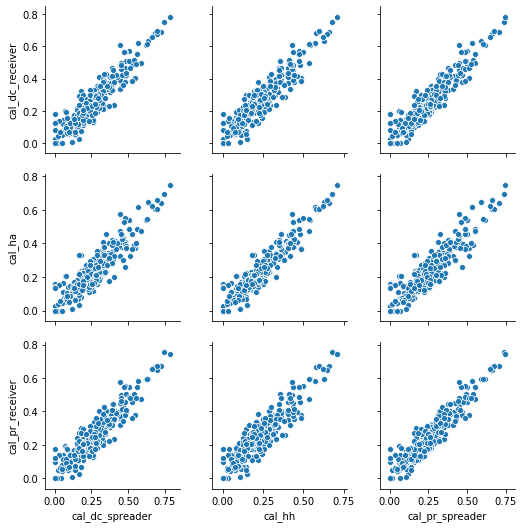

In [10]:
sns.pairplot(weekday_res,  x_vars=["cal_dc_spreader", "cal_hh", "cal_pr_spreader"], y_vars=["cal_dc_receiver","cal_ha","cal_pr_receiver"])

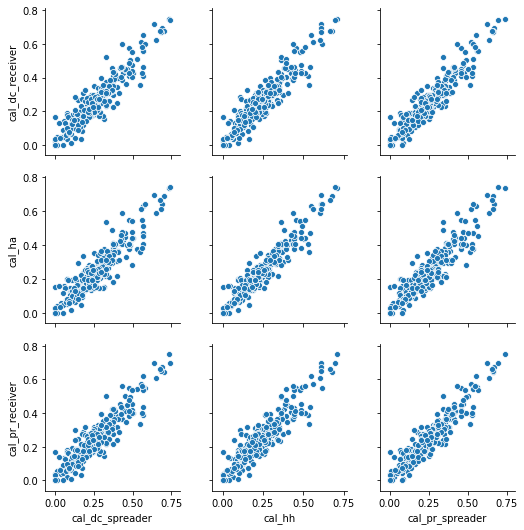

In [11]:
sns.pairplot(weekend_res,  x_vars=["cal_dc_spreader", "cal_hh", "cal_pr_spreader"], y_vars=["cal_dc_receiver","cal_ha","cal_pr_receiver"])

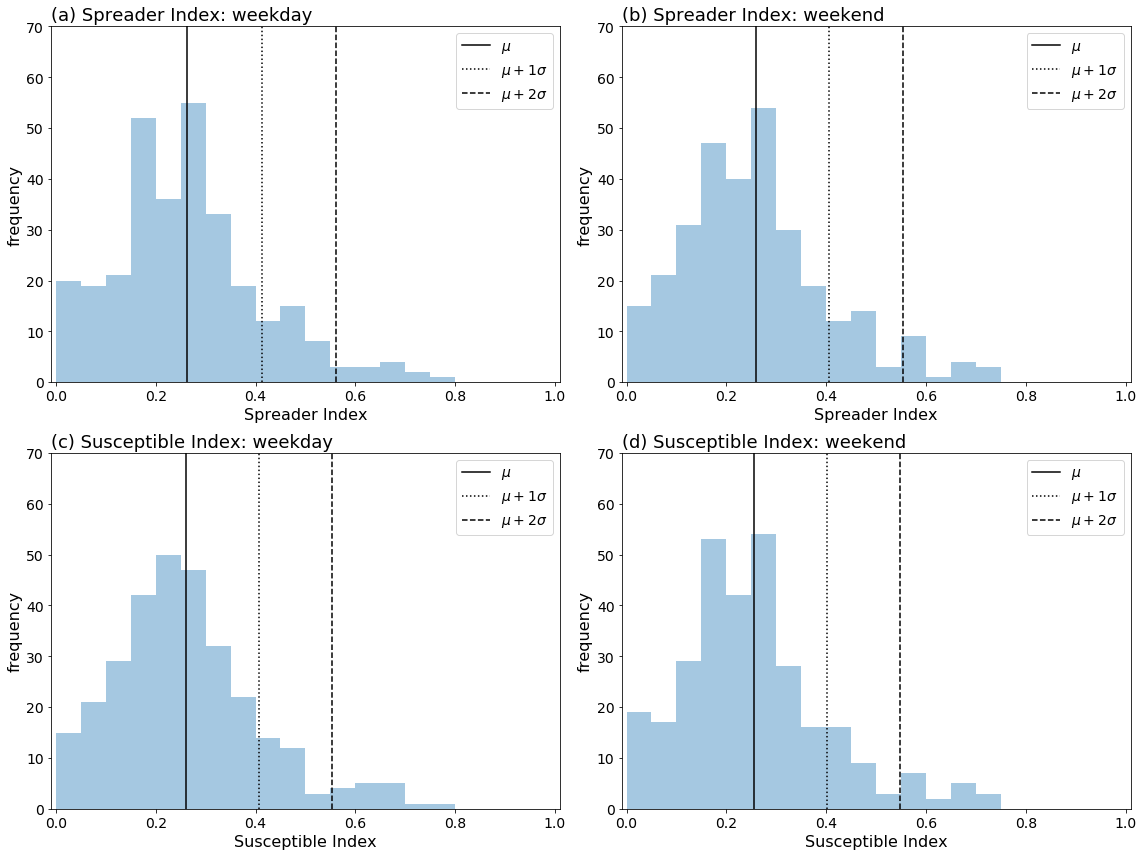

In [12]:
fig, axg = plt.subplots(2,2, figsize=(16,12))
axs = axg.flatten()

dfs = [weekday_res, weekend_res, weekday_res, weekend_res]
cols = ["cal_dc_spreader", "cal_dc_spreader", "cal_dc_receiver", "cal_dc_receiver"]
labs = "abcd"
labs2 = ["Spreader Index: weekday", "Spreader Index: weekend", "Susceptible Index: weekday", "Susceptible Index: weekend"]
xlabs = ["Spreader Index", "Spreader Index", "Susceptible Index", "Susceptible Index"]
for i in range(4):
    ax = axs[i]
    this_df = dfs[i]
    this_col = cols[i]
    sns.distplot(this_df[this_col], kde=False, ax=ax, bins=[ i*0.05 for i in range(21) ])
    ax.set_xlim([-0.01,1.01])
    ax.set_ylim([-0.01,70.01])
    ax.set_xticks([ i*0.2 for i in range(6) ])
    ax.set_xticklabels([ round(i*0.2, 1) for i in range(6) ], fontsize=14)
    ax.set_yticks([ i*10 for i in range(8) ])
    ax.set_yticklabels([ i*10 for i in range(8) ], fontsize=14)
    l0 = ax.axvline(x=this_df[this_col].mean(), ls="-", c="k", label="$\mu$")
    l2 = ax.axvline(x=this_df[this_col].mean()+1*this_df[this_col].std(), ls=":", c="k", label="$\mu+1\sigma$")
    l1 = ax.axvline(x=this_df[this_col].mean()+2*this_df[this_col].std(), ls="--", c="k", label="$\mu+2\sigma$")
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left", fontsize=18)
    ax.set_xlabel(xlabs[i], fontsize=16)
    ax.set_ylabel("frequency", fontsize=16)
    ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig("../b-calculation/figs/SR_index_threevlines_G.png", dpi=100, bbox_inches="tight")

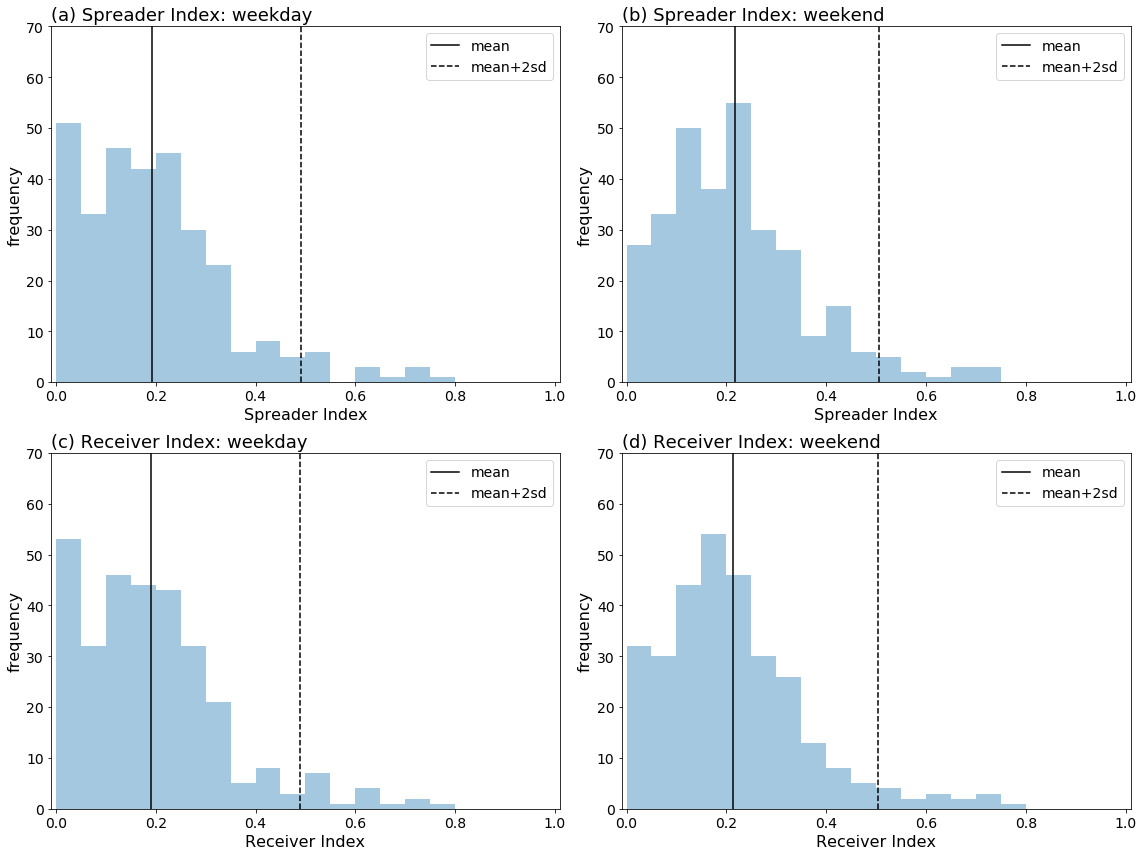

In [13]:
fig, axg = plt.subplots(2,2, figsize=(16,12))
axs = axg.flatten()

dfs = [weekday_res, weekend_res, weekday_res, weekend_res]
cols = ["cal_dc_spreader", "cal_dc_spreader", "cal_dc_receiver", "cal_dc_receiver"]
labs = "abcd"
labs2 = ["Spreader Index: weekday", "Spreader Index: weekend", "Receiver Index: weekday", "Receiver Index: weekend"]
xlabs = ["Spreader Index", "Spreader Index", "Receiver Index", "Receiver Index"]
for i in range(4):
    ax = axs[i]
    this_df = dfs[i]
    this_col = cols[i]
    sns.distplot(this_df[this_col], kde=False, ax=ax, bins=[ i*0.05 for i in range(21) ])
    ax.set_xlim([-0.01,1.01])
    ax.set_ylim([-0.01,70.01])
    ax.set_xticks([ i*0.2 for i in range(6) ])
    ax.set_xticklabels([ round(i*0.2, 1) for i in range(6) ], fontsize=14)
    ax.set_yticks([ i*10 for i in range(8) ])
    ax.set_yticklabels([ i*10 for i in range(8) ], fontsize=14)
    l0 = ax.axvline(x=this_df[this_col].mean(), ls="-", c="k", label="mean")
    l1 = ax.axvline(x=this_df[this_col].mean()+2*this_df[this_col].std(), ls="--", c="k", label="mean+2sd")
    #l2 = ax.axvline(x=this_df[this_col].mean()+1*this_df[this_col].std(), ls=":", c="k", label="mean+1sd")
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left", fontsize=18)
    ax.set_xlabel(xlabs[i], fontsize=16)
    ax.set_ylabel("frequency", fontsize=16)
    ax.legend(fontsize=14)
plt.tight_layout()
#plt.savefig("../b-calculation/figs/SR_index.png", dpi=100, bbox_inches="tight")

In [11]:
dfs = [weekday_res, weekend_res, weekday_res, weekend_res]
cols = ["cal_dc_spreader", "cal_dc_spreader", "cal_dc_receiver", "cal_dc_receiver"]
for i in range(4):
    this_df = dfs[i]
    this_col = cols[i]
    print(this_col)
    print(this_df[this_col].mean())
    print(this_df[this_col].mean()+1*this_df[this_col].std())
    print(this_df[this_col].mean()+2*this_df[this_col].std())
    temp = this_df[this_df[this_col]>=this_df[this_col].mean()+2*this_df[this_col].std()]
    print(len(temp))

cal_dc_spreader
0.2629163782371372
0.4123933095964596
0.561870240955782
12
cal_dc_spreader
0.25936258093583925
0.4066256846891397
0.5538887884424402
17
cal_dc_receiver
0.26059050370807135
0.4072430212862548
0.5538955388644382
15
cal_dc_receiver
0.2561841990114269
0.4021293883893686
0.5480745777673103
17


In [13]:
col = "cal_pr_receiver"

this_mean = weekday_res[col].mean()
this_std = weekday_res[col].std()
weekday_res[weekday_res[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)

,node,cal_pr_receiver
ind,,
115,JURONG WEST CENTRAL,0.753230
158,WOODLANDS REGIONAL CENTRE,0.743753
241,TOA PAYOH CENTRAL,0.672912
116,JURONG GATEWAY,0.669000
145,CHOA CHU KANG CENTRAL,0.663872
276,SEMBAWANG CENTRAL,0.656744
217,YISHUN WEST,0.647473
200,MARITIME SQUARE,0.596910
159,WOODLANDS EAST,0.595335


In [14]:
col = "cal_dc_receiver"

this_mean = weekday_res[col].mean()
this_std = weekday_res[col].std()
weekday_res[weekday_res[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)

,node,cal_dc_receiver
ind,,
158,WOODLANDS REGIONAL CENTRE,0.784436
115,JURONG WEST CENTRAL,0.749499
241,TOA PAYOH CENTRAL,0.692804
116,JURONG GATEWAY,0.686691
145,CHOA CHU KANG CENTRAL,0.682181
217,YISHUN WEST,0.674452
276,SEMBAWANG CENTRAL,0.661139
159,WOODLANDS EAST,0.636294
55,TAMPINES EAST,0.619298


In [15]:
col = "cal_dc_spreader"

this_mean = weekday_res[col].mean()
this_std = weekday_res[col].std()
weekday_res[weekday_res[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)

,node,cal_dc_spreader
ind,,
158,WOODLANDS REGIONAL CENTRE,0.783383
115,JURONG WEST CENTRAL,0.740249
116,JURONG GATEWAY,0.722314
241,TOA PAYOH CENTRAL,0.694341
217,YISHUN WEST,0.694164
145,CHOA CHU KANG CENTRAL,0.682116
276,SEMBAWANG CENTRAL,0.664510
159,WOODLANDS EAST,0.633443
259,BUKIT BATOK CENTRAL,0.626451


In [16]:
col = "cal_pr_spreader"

this_mean = weekday_res[col].mean()
this_std = weekday_res[col].std()
weekday_res[weekday_res[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)

,node,cal_pr_spreader
ind,,
158,WOODLANDS REGIONAL CENTRE,0.743962
115,JURONG WEST CENTRAL,0.740249
116,JURONG GATEWAY,0.709836
241,TOA PAYOH CENTRAL,0.676966
217,YISHUN WEST,0.663948
145,CHOA CHU KANG CENTRAL,0.663464
276,SEMBAWANG CENTRAL,0.651970
200,MARITIME SQUARE,0.614979
259,BUKIT BATOK CENTRAL,0.606289


In [17]:
def get_top(df, col, times_std=2):
    this_mean = df[col].mean()
    this_std = df[col].std()
    return df[df[col]>=this_mean+times_std*this_std][["node", col]].sort_values(by=col, ascending=False)


def get_top_2levels(df, col):
    this_mean = df[col].mean()
    this_std = df[col].std()
    top_2sd = df[df[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)
    top_1sd = df[df[col]>=this_mean+1*this_std][["node", col]].sort_values(by=col, ascending=False)
    top_1sd["top"] = 2
    for i in top_2sd.index:
        #print(i)
        top_1sd.at[i,"top"] = 1
    #print(top_1sd)
    return top_1sd
    

def get_pos(nodes, pos):
    xs = []
    ys = []
    for n in nodes:
        x,y = pos[n]
        xs.append(x)
        ys.append(y)
    return xs, ys



In [19]:
#get_top_2levels(weekday_res, "cal_pr_spreader")

In [18]:
df_merge = pd.merge(get_top_2levels(weekday_res, "cal_dc_spreader"), get_top_2levels(weekday_res, "cal_dc_receiver"), left_on="node", right_on="node", how="outer")#.sort_values(by=["top_x", "top_y"])
df_merge#[pd.isnull(df_merge["top_x"])]

,node,cal_dc_spreader,top_x,cal_dc_receiver,top_y
0,WOODLANDS REGIONAL CENTRE,0.783383,1.0,0.784436,1.0
1,JURONG WEST CENTRAL,0.740249,1.0,0.749499,1.0
2,JURONG GATEWAY,0.722314,1.0,0.686691,1.0
3,TOA PAYOH CENTRAL,0.694341,1.0,0.692804,1.0
4,YISHUN WEST,0.694164,1.0,0.674452,1.0
5,CHOA CHU KANG CENTRAL,0.682116,1.0,0.682181,1.0
6,SEMBAWANG CENTRAL,0.664510,1.0,0.661139,1.0
7,WOODLANDS EAST,0.633443,1.0,0.636294,1.0
8,BUKIT BATOK CENTRAL,0.626451,1.0,0.611966,1.0
9,MARITIME SQUARE,0.621545,1.0,0.608511,1.0


In [19]:
weekday_res.head()

,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
ind,,,,,,,
0,NEWTON CIRCUS,0.402520,0.360719,0.385378,0.389101,0.357611,0.370971
1,BOULEVARD,0.502729,0.472499,0.498768,0.573979,0.539979,0.549315
2,CHINATOWN,0.544634,0.482205,0.512824,0.401757,0.371728,0.381759
3,MOULMEIN,0.412346,0.393649,0.387418,0.425115,0.411934,0.401186
4,CITY HALL,0.477205,0.457724,0.457491,0.419084,0.409713,0.395974


In [20]:
cols = [col for col in weekday_res.columns if not(col=="node")]
cols2 = []
lvl_cols = {}
for col in cols:
    this_col = weekday_res[col]
    this_mean = this_col.mean()
    this_std = this_col.std()
    lvl = []
    for v in this_col:
        if v>=this_mean+2*this_std:
            lvl.append(1)
        elif v>=this_mean+this_std:
            lvl.append(2)
        else:
            lvl.append(3)
    new_col = col.replace("cal", "lvl")
    lvl_cols[new_col] = lvl
    cols2.append(new_col)
    
lvl_cols.update({"node": weekday_res["node"]})
lvl_res = pd.DataFrame.from_dict(lvl_cols)
lvl_res = lvl_res[["node"]+cols2]
lvl_res.head()

,node,lvl_dc_spreader,lvl_hh,lvl_pr_spreader,lvl_dc_receiver,lvl_ha,lvl_pr_receiver
ind,,,,,,,
0,NEWTON CIRCUS,3,3,3,3,3,3
1,BOULEVARD,2,2,2,1,1,1
2,CHINATOWN,2,2,2,3,2,3
3,MOULMEIN,3,2,3,2,2,2
4,CITY HALL,2,2,2,2,2,2


In [21]:
lvl_res.to_csv("Super_SR_lvl_weekday_G.csv", index_label="ind")

In [22]:
cols = [col for col in weekend_res.columns if not(col=="node")]
cols2 = []
lvl_cols = {}
for col in cols:
    this_col = weekend_res[col]
    this_mean = this_col.mean()
    this_std = this_col.std()
    lvl = []
    for v in this_col:
        if v>=this_mean+2*this_std:
            lvl.append(1)
        elif v>=this_mean+this_std:
            lvl.append(2)
        else:
            lvl.append(3)
    new_col = col.replace("cal", "lvl")
    lvl_cols[new_col] = lvl
    cols2.append(new_col)
    
lvl_cols.update({"node": weekend_res["node"]})
lvl_res = pd.DataFrame.from_dict(lvl_cols)
lvl_res = lvl_res[["node"]+cols2]
lvl_res.head()

,node,lvl_dc_spreader,lvl_hh,lvl_pr_spreader,lvl_dc_receiver,lvl_ha,lvl_pr_receiver
ind,,,,,,,
0,NEWTON CIRCUS,3,3,3,3,3,3
1,BOULEVARD,1,1,1,1,1,1
2,CHINATOWN,1,1,2,2,2,3
3,MOULMEIN,3,2,3,2,2,3
4,CITY HALL,2,2,2,2,2,2


In [23]:
lvl_res.to_csv("Super_SR_lvl_weekend_G.csv", index_label="ind")

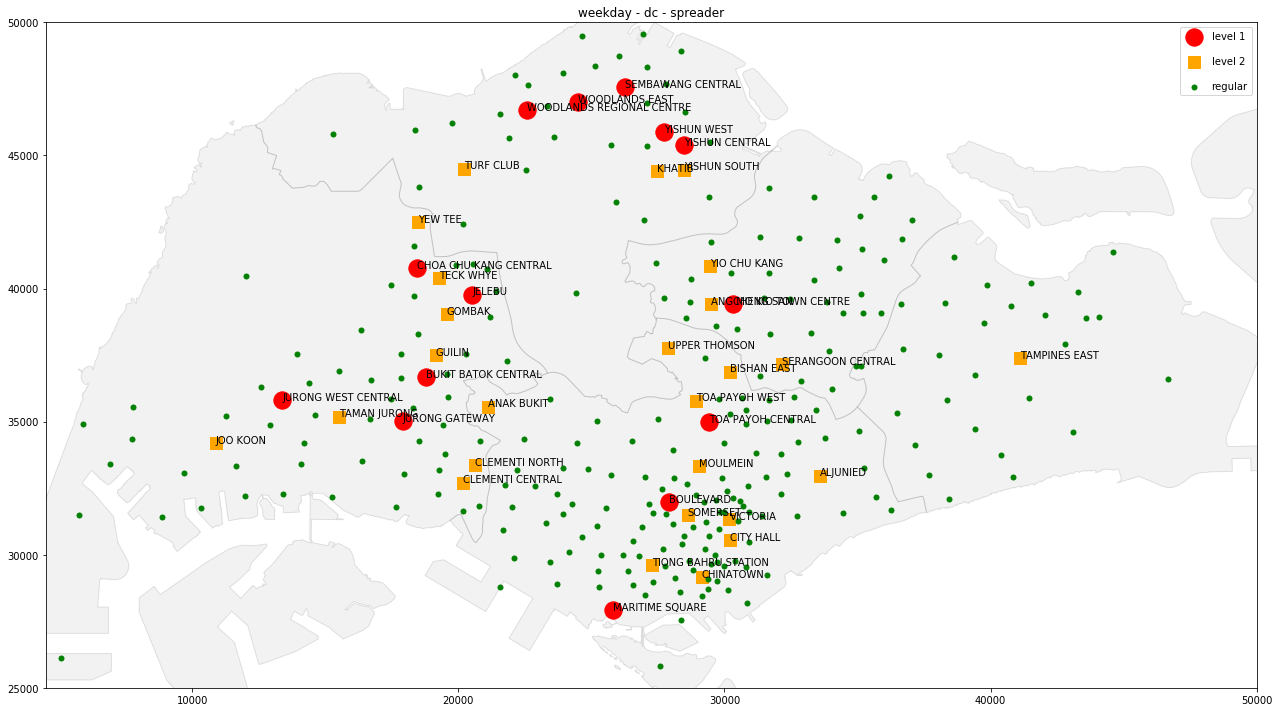

In [30]:

fig, ax = plt.subplots(figsize=(20,10))

col_method = "dc"
direction = "spreader"
day = "weekday"
this_df = weekday_res
this_col = "lvl_{}_{}".format(col_method, direction)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

lvl_res

lvl1 = lvl_res[lvl_res[this_col]==1]["node"].tolist()
lvl2 = lvl_res[lvl_res[this_col]==2]["node"].tolist()
lvl3 = lvl_res[lvl_res[this_col]==3]["node"].tolist()

xs_1, ys_1 = get_pos(lvl1, pos)
xs_2, ys_2 = get_pos(lvl2, pos)
xs_3, ys_3 = get_pos(lvl3, pos)

ax.scatter(xs_1, ys_1, s=300, c="red", label="level 1", zorder=3, marker="o")
ax.scatter(xs_2, ys_2, s=150, c="orange", label="level 2", zorder=3, marker="s")
ax.scatter(xs_3, ys_3, s=100, c="green", label="regular", zorder=3, marker=".")
#ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = set(lvl1) | set(lvl2)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))

ax.legend(labelspacing=1.5, )
ax.set_title("{} - {} - {}".format(day, col_method, direction))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/val_dist-{}-{}_G.png".format(day, col_method), dpi=100, bbox_inches="tight")


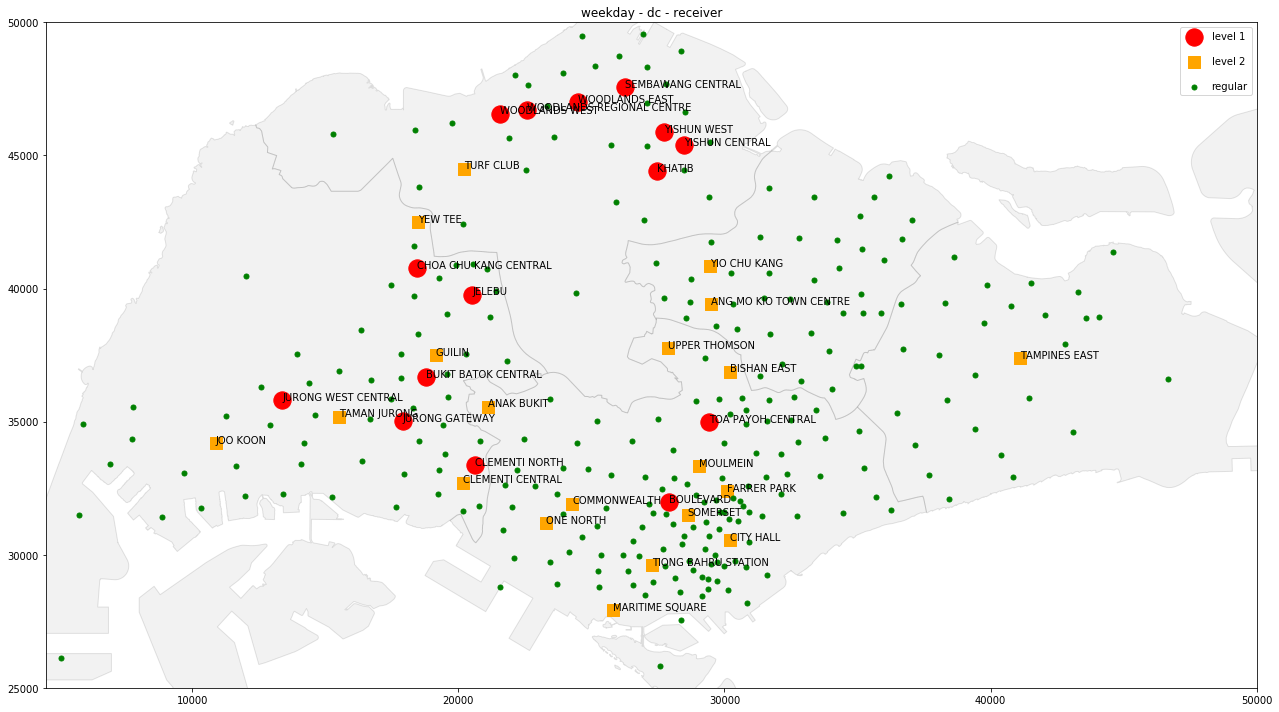

In [31]:

fig, ax = plt.subplots(figsize=(20,10))

col_method = "dc"
direction = "receiver"
day = "weekday"
this_df = weekday_res
this_col = "lvl_{}_{}".format(col_method, direction)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

lvl_res

lvl1 = lvl_res[lvl_res[this_col]==1]["node"].tolist()
lvl2 = lvl_res[lvl_res[this_col]==2]["node"].tolist()
lvl3 = lvl_res[lvl_res[this_col]==3]["node"].tolist()

xs_1, ys_1 = get_pos(lvl1, pos)
xs_2, ys_2 = get_pos(lvl2, pos)
xs_3, ys_3 = get_pos(lvl3, pos)

ax.scatter(xs_1, ys_1, s=300, c="red", label="level 1", zorder=3, marker="o")
ax.scatter(xs_2, ys_2, s=150, c="orange", label="level 2", zorder=3, marker="s")
ax.scatter(xs_3, ys_3, s=100, c="green", label="regular", zorder=3, marker=".")
#ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = set(lvl1) | set(lvl2)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))

ax.legend(labelspacing=1.5, )
ax.set_title("{} - {} - {}".format(day, col_method, direction))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/val_dist-{}-{}-{}.png".format(day, col_method, direction), dpi=100, bbox_inches="tight")


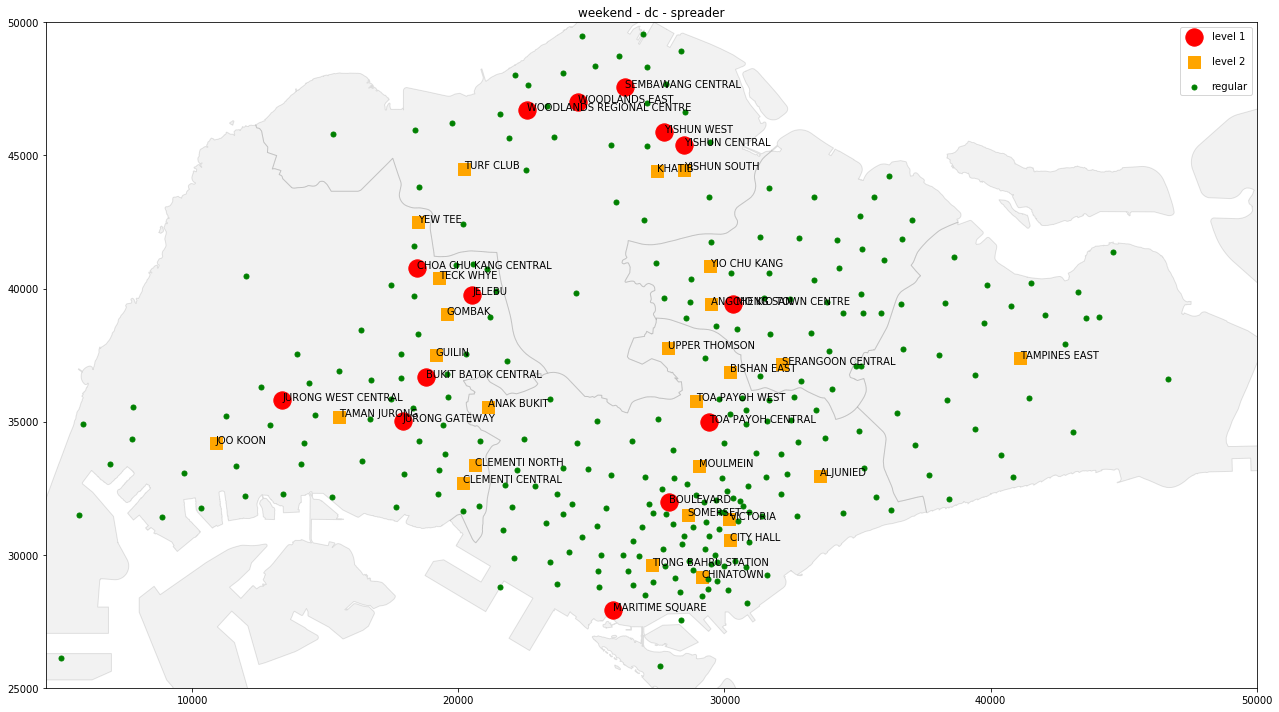

In [32]:

fig, ax = plt.subplots(figsize=(20,10))

col_method = "dc"
direction = "spreader"
day = "weekend"
this_df = weekend_res
this_col = "lvl_{}_{}".format(col_method, direction)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

lvl_res

lvl1 = lvl_res[lvl_res[this_col]==1]["node"].tolist()
lvl2 = lvl_res[lvl_res[this_col]==2]["node"].tolist()
lvl3 = lvl_res[lvl_res[this_col]==3]["node"].tolist()

xs_1, ys_1 = get_pos(lvl1, pos)
xs_2, ys_2 = get_pos(lvl2, pos)
xs_3, ys_3 = get_pos(lvl3, pos)

ax.scatter(xs_1, ys_1, s=300, c="red", label="level 1", zorder=3, marker="o")
ax.scatter(xs_2, ys_2, s=150, c="orange", label="level 2", zorder=3, marker="s")
ax.scatter(xs_3, ys_3, s=100, c="green", label="regular", zorder=3, marker=".")
#ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = set(lvl1) | set(lvl2)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))

ax.legend(labelspacing=1.5, )
ax.set_title("{} - {} - {}".format(day, col_method, direction))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/val_dist-{}-{}-{}.png".format(day, col_method, direction), dpi=100, bbox_inches="tight")


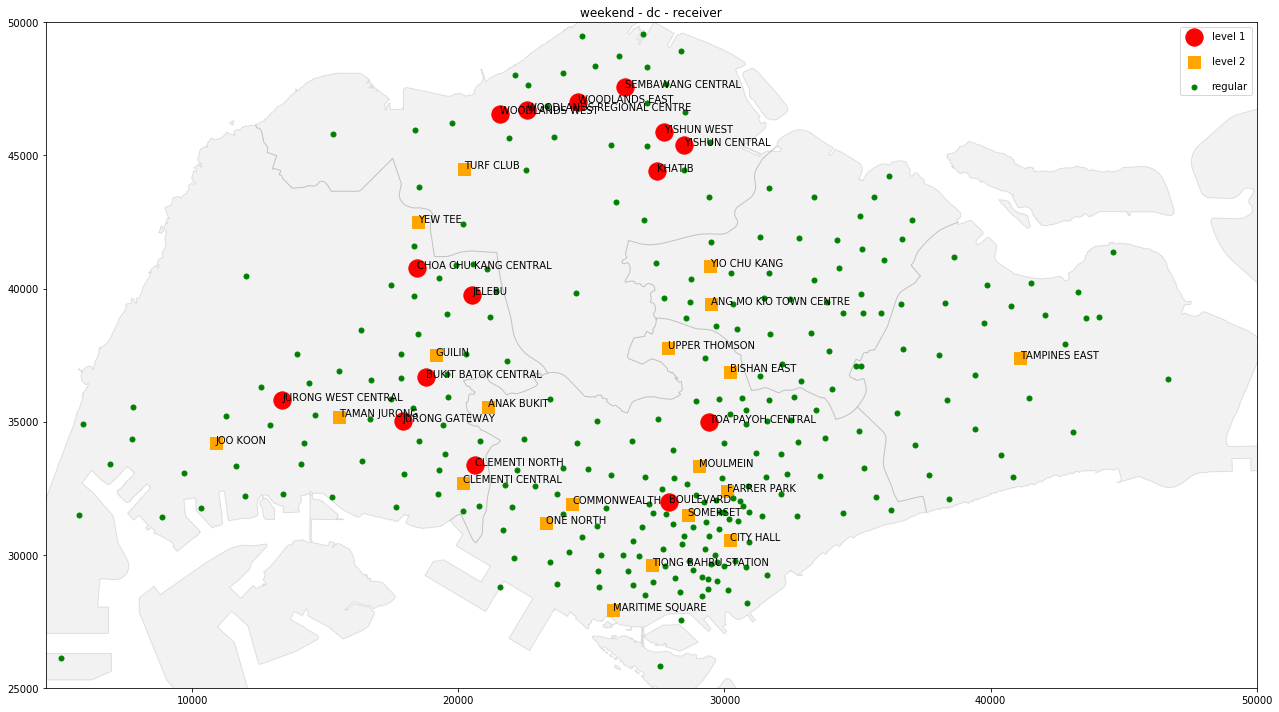

In [33]:

fig, ax = plt.subplots(figsize=(20,10))

col_method = "dc"
direction = "receiver"
day = "weekend"
this_df = weekend_res
this_col = "lvl_{}_{}".format(col_method, direction)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

lvl_res

lvl1 = lvl_res[lvl_res[this_col]==1]["node"].tolist()
lvl2 = lvl_res[lvl_res[this_col]==2]["node"].tolist()
lvl3 = lvl_res[lvl_res[this_col]==3]["node"].tolist()

xs_1, ys_1 = get_pos(lvl1, pos)
xs_2, ys_2 = get_pos(lvl2, pos)
xs_3, ys_3 = get_pos(lvl3, pos)

ax.scatter(xs_1, ys_1, s=300, c="red", label="level 1", zorder=3, marker="o")
ax.scatter(xs_2, ys_2, s=150, c="orange", label="level 2", zorder=3, marker="s")
ax.scatter(xs_3, ys_3, s=100, c="green", label="regular", zorder=3, marker=".")
#ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = set(lvl1) | set(lvl2)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))

ax.legend(labelspacing=1.5, )
ax.set_title("{} - {} - {}".format(day, col_method, direction))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/val_dist-{}-{}-{}.png".format(day, col_method, direction), dpi=100, bbox_inches="tight")


In [45]:
def draw_parallel(df, top_nodes, cols=None):
    if cols is None:
        cols = [ col for col in df.columns if col!="node"]
    lines = []
    df2 = df.set_index("node")
    #print(df2.head())
    for n in top_nodes:
        line = []
        row = df2.loc[n]
        #print(row)
        for col in cols:
            line.append( row[col] )
        #print(line)
        lines.append(line)
        #break
    fig, ax = plt.subplots(figsize=(16,12))
    for line, n in zip(lines, top_nodes):
        ax.plot(line, label=n)
    for i in range(len(cols)):
        ax.axvline(x=i, ls=':', c='k')
    ax.set_xticks(list(range(len(cols))))
    ax.set_xticklabels(cols)
    ax.set_ylim([0,1])
    plt.legend()
    plt.tight_layout()